In [1]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import rcParams # plot size customization
rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # visualizations

In [4]:
# Importing the data
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [5]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [6]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

In [7]:
# Data standardization with sklearn
standardizer = StandardScaler()
model = GaussianNB(priors = None, var_smoothing = 1e-09)
# fit the model with the training data
model.fit(X_train,y_train)

GaussianNB()

In [8]:
# Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=4)
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.985


In [9]:
# Predictions
predictions = model.predict(X_test)

In [10]:
# Classificaton report  
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.92      0.98      0.95        46

    accuracy                           0.92        60
   macro avg       0.91      0.85      0.87        60
weighted avg       0.92      0.92      0.91        60



Recall metric in the testing dataset: 97.82608695652173%


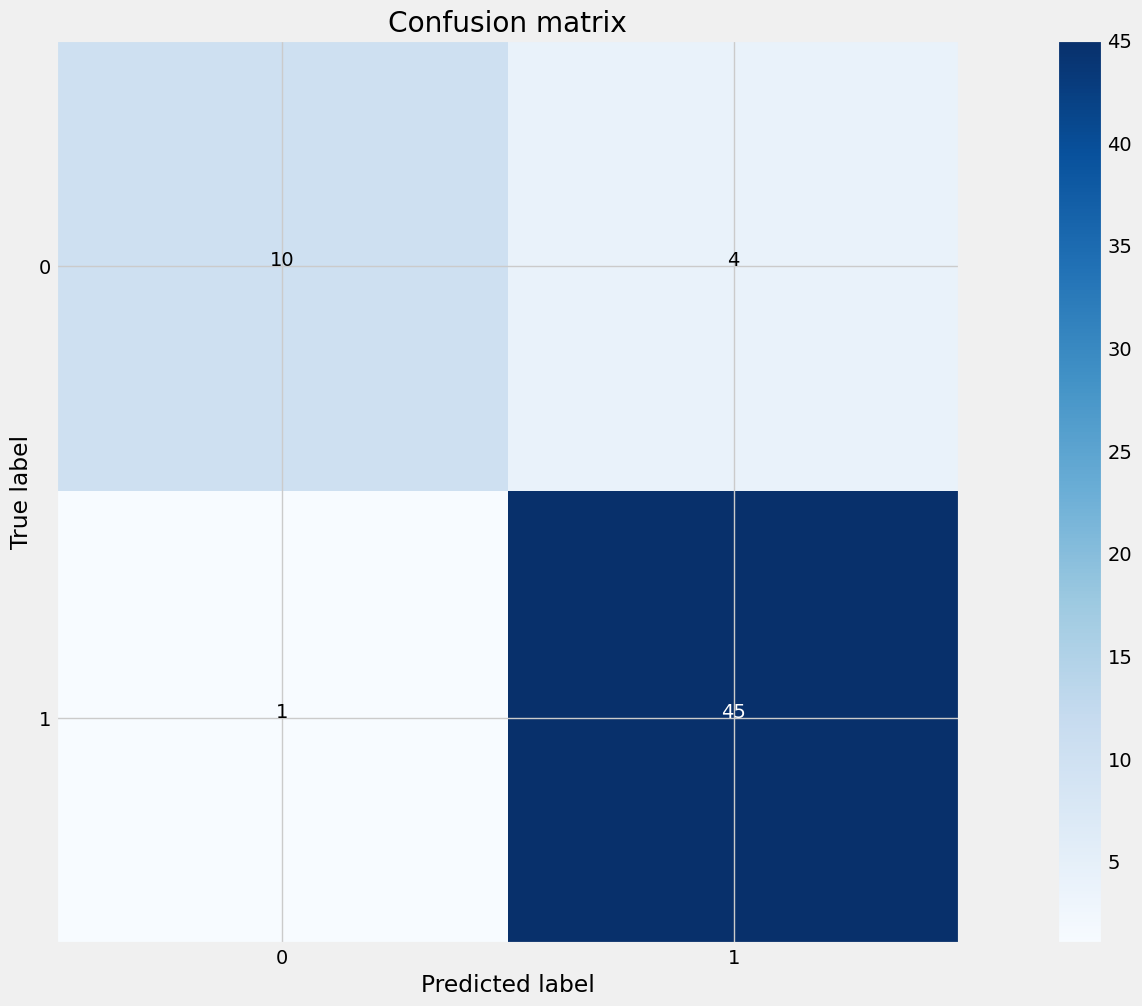

In [11]:
# Confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, predictions)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [12]:
# Predictions
yhat = model.predict(X_test)
yhat_prob = model.predict_proba(X_test)

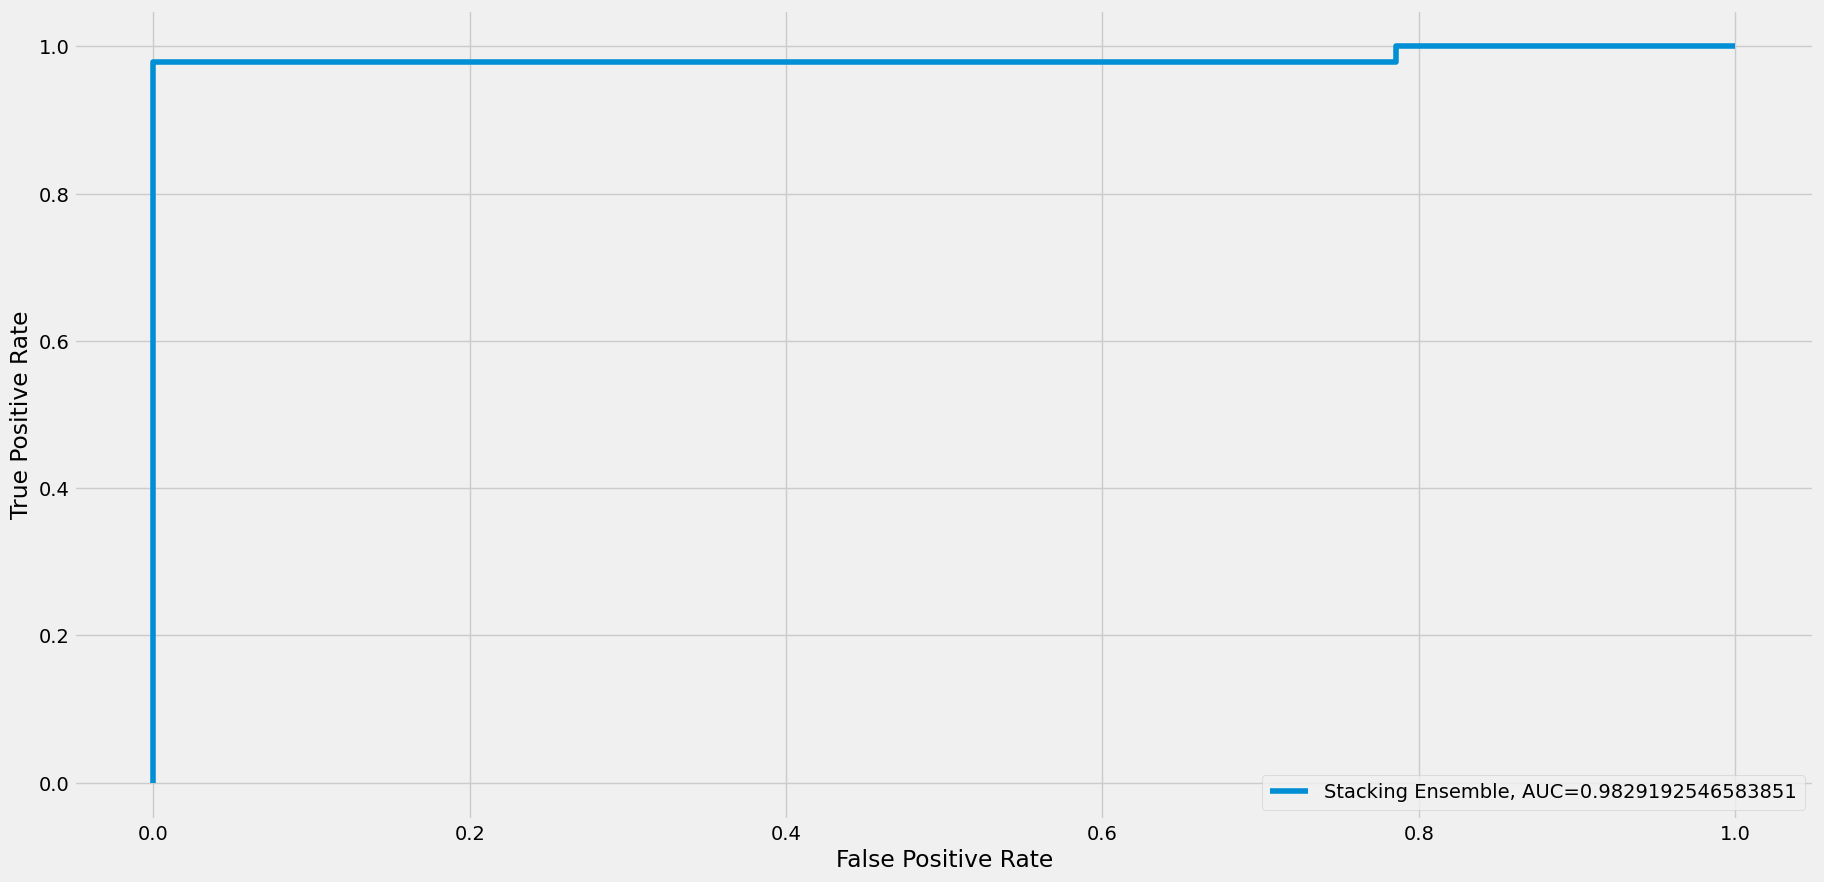

In [13]:
# Import the metrics class
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="Stacking Ensemble, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

Random (chance) Prediction: AUROC = 0.500
XGBoost: AUROC = 0.983


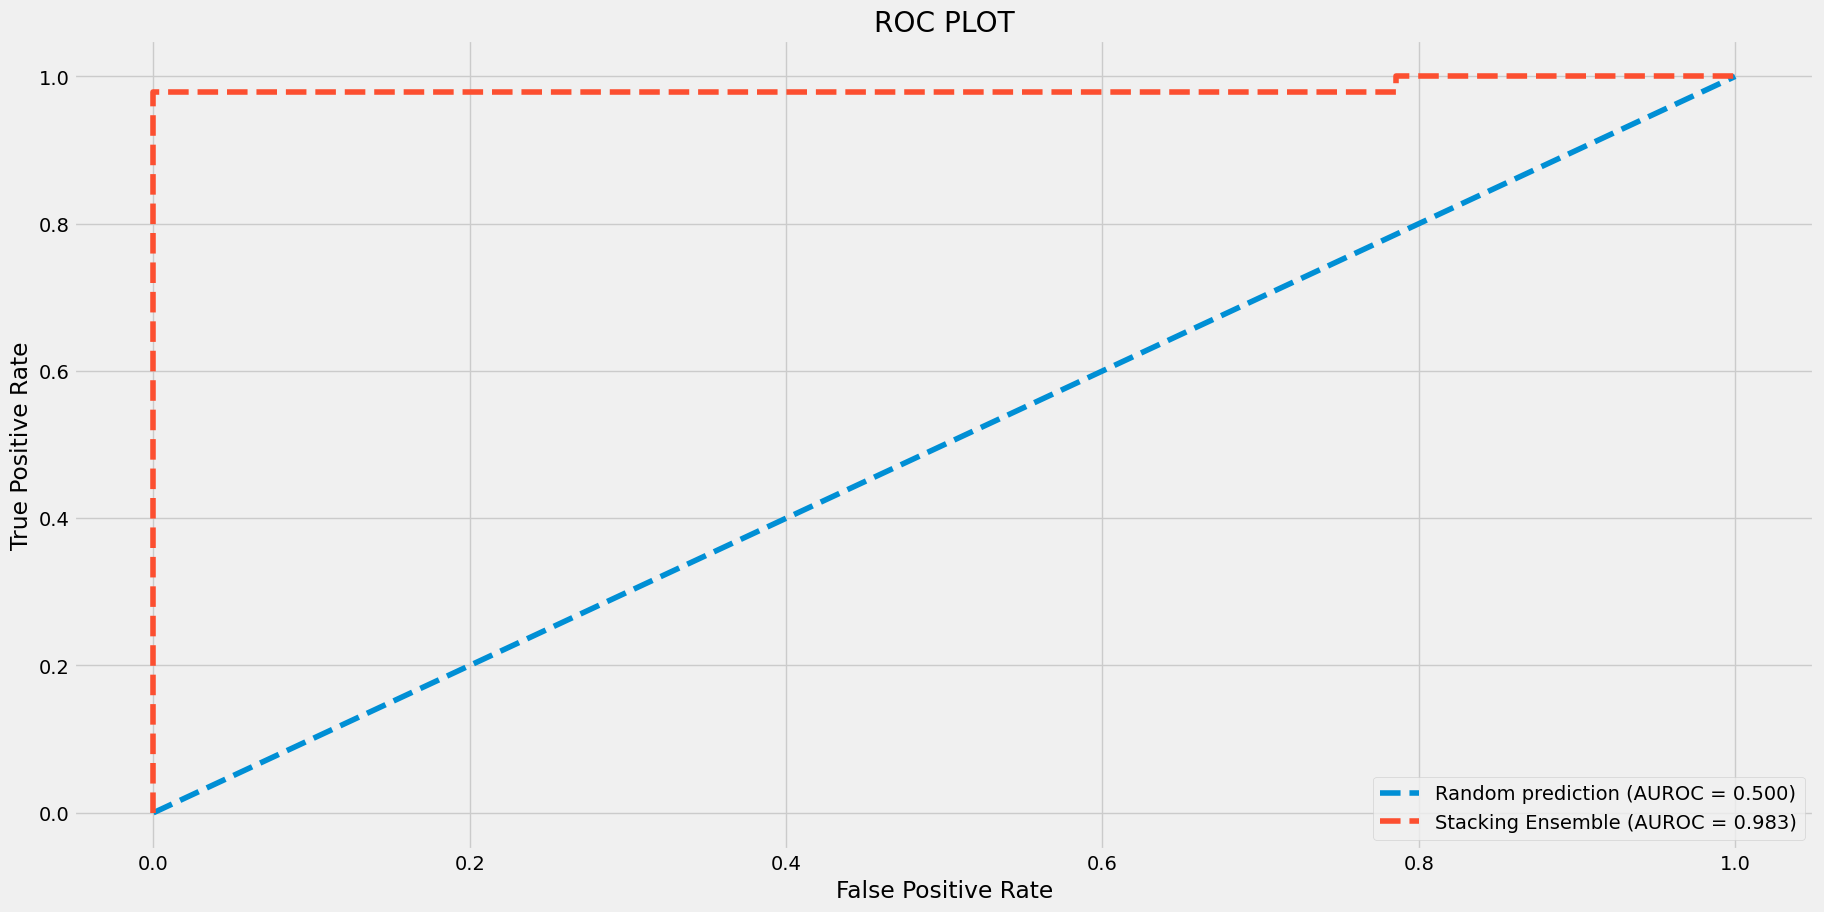

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
r_probs = [0 for _ in range(len(y_test))]
prob_y_12 = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
prob_y_12 = [p[1] for p in prob_y_12]

r_auc = roc_auc_score(y_test, r_probs)
auc1 = roc_auc_score(y_test, prob_y_12)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('XGBoost: AUROC = %.3f' % (auc1))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
prob_y_12_fpr, prob_y_12_tpr, _ = roc_curve(y_test, prob_y_12)
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(prob_y_12_fpr, prob_y_12_tpr, linestyle='--', label='Stacking Ensemble (AUROC = %0.3f)' % auc1)


# Title
plt.title('ROC PLOT')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()